<a href="https://colab.research.google.com/github/kiryu-3/Prmn2023_DS/blob/main/Python/Python_Stats/Stats_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 回帰分析

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## 説明変数と目的変数

「何かの原因となっている変数」を**説明変数**、  
「その原因を受けて発生した結果となっている変数」を**目的変数**、  
といいます。

説明変数と目的変数にはいくつかの表現があります。  
詳しくは[こちら](https://bit.ly/3kl6M6S)を参照してください。

## 回帰

**目的変数**$y$について**説明変数**$x$を使った式で表すことを**回帰**といいます。

例として、身長から体重を予測することを考えてみましょう。

身長170cmである場合の平均的な体重を予測しようとしたとき、  
「身長が170cm」という条件付きでの体重の平均を，**条件付き平均**といいます。

この**条件付き平均**を以下のような**回帰直線**（**線形回帰**ともいう）を使って求めるのが回帰です。

$$
\hat{y}=\theta_0+\theta_1x_1+\theta_2x_2+ … + \theta_nx_n
$$

$\hat{y}$は、$x$に対する$y$の条件付き平均です。

### 最小二乗法

パラメータ $\theta_0 , \theta_1 , \theta_2, ･･･ \theta_n,$ を求めることができれば、  
回帰直線が一つに定まります。

予測値と実測値の差のことを**残差**と呼びます。  
（よく聞く「**誤差**」というワードと「**残差**」の違いについては[こちら](https://bit.ly/3KHNXFo)を参照してください。）

**残差の二乗和を最小にする**アルゴリズムを**最小二乗法**と呼びます。


特徴量が一つの場合を例とします。  
このとき、回帰直線は以下のように定まるものとします。

$$
\hat{y} = a + bx　(a=\theta_0 , b=\theta_1)
$$

$\hat{y}$ は**条件付き平均**、つまり予測値であるので、  
実際のデータとは多少の誤差があると考えられます。

![リンクテキスト](https://imgur.com/pAMsBS6.png)


残差は以下のようにして求めることができます。

![リンクテキスト](https://imgur.com/PMQhVAu.png)


**残差の二乗の和**が最小になるような $a$ と$b$ を求めるのが、最小二乗法になります。

$$
\sum^{n}_{i=1}{e_i^2}=\sum^{n}_{i=1}{\left\{y_i-(a+bx_i)\right\}^2} = \sum^{n}_{i=1}({y_i-\hat{y}_i)^2}
$$

上の式のように、「**予測値と実測値のずれを計算する関数**」のことを**損失関数**と呼びます。

今回の場合であれば後は $a$ と $b$ の値を求めて、  
損失関数を「最小化」していくのみとなります。

ここまでは特徴量が一つの場合を見てきましたが、特徴量が複数になっても基本的な流れは同じです。

## 単回帰分析

回帰直線 $\hat{y}=a+bx$ では、説明変数が$x$の一つだけ用いられています。  

このような**単回帰式**を求めることを**単回帰分析**といいます。

### 単回帰分析の流れ

① **モデル**を決める  
② **損失関数**を決める  
③ 損失関数を「**最小化**」する

#### モデルを決める

今回は単回帰分析なので、モデルは以下のようになります。

$$
\hat{y}_i = a + bx_i
$$

#### 損失関数を決める

**最小二乗法**によって求めるので、損失関数は以下のようになります。  

$$
\sum^{n}_{i=1}{e_i^2}=\sum^{n}_{i=1}{\left\{y_i-(a+bx_i)\right\}^2} = \sum^{n}_{i=1}({y_i-\hat{y}_i)^2}
$$

#### 損失関数を「最小化」する

損失関数を計算すると、以下のような結果が得られます。

$$
a=\bar{y}-b\bar{x}  
$$

$$
b=r_{xy}\frac{s_y}{s_x}
$$

* $S_y$：$y$の標準偏差
* $S_x$：$x$の標準偏差  
* $r_{xy}$：$x$と $y$ の相関係数

（答えの導出過程は[こちら](https://bellcurve.jp/statistics/course/24375.html)や『データ活用基礎』第5回プリント課題の解答を参照してください。）  

### Pythonによる描画

身長から体重を予測することを例として、回帰直線を求めてみましょう。

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(167.5, 190.0)

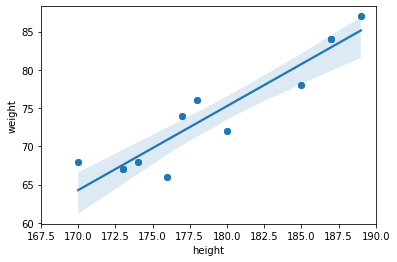

In [123]:
weight = np.array([68, 84, 68, 87, 78, 84, 76, 74, 66, 72, 67, 67])
height = np.array([174, 187, 170, 189, 185, 187, 178, 177, 176, 180, 173, 173])

sns.regplot(height, weight)  # 回帰直線の描画
plt.scatter(height, weight)  # 散布図の描画
plt.xlabel('height')
plt.ylabel('weight')
plt.xlim(167.5,190)

次はscikit-learnを使って描画してみます。

理屈については今回触れないので  
気になる方は[こちら](https://datawokagaku.com/linear_reg_implement/)などを参照してください。

In [124]:
# 学習のためのインスタンス作成
reg = LinearRegression()

"""
fitメソッドで学習する
.fit(x,y)に入れる"x"は、行列である必要がある
"""
X = np.expand_dims(height, axis=-1)  # 次元を1つ追加して「ベクトル→行列」にする
y = weight
reg.fit(X, y)

# "a"と"b"の表示 
print("b={}".format(reg.coef_))
print("a={}".format(reg.intercept_))

b=[1.09812147]
a=-122.40525259894213


以下の式が成り立つか確認してみましょう。

$$
a=\bar{y}-b\bar{x}  
$$

$$
b=r\frac{s_y}{s_x}
$$

In [125]:
# 標準偏差
s_x = np.std(height)
s_y = np.std(weight)
# 平均
mean_x = np.mean(height)
mean_y = np.mean(weight)
# 相関係数
r = np.corrcoef(weight, height)[0][1]
b = r * s_y/s_x
a = mean_y - b*mean_x
print("b={}".format(b))
print("a={}".format(a))

b=1.0981214663505376
a=-122.40525259894213


では求めた$a$と$b$から回帰直線を描画してみましょう。

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'weight')

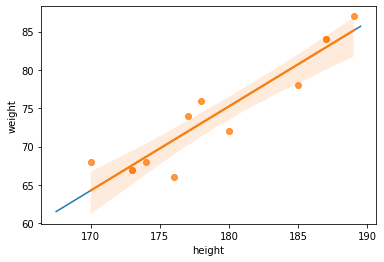

In [126]:
# x軸の値作成
x = np.arange(167.5, 190, 1)
plt.plot(x, b*x+a, )
# seaborn のregplotも合わせて描画する．
sns.regplot(height, weight)
plt.xlabel('height')
plt.ylabel('weight')

先ほど描画したregplotとぴったり重なっていますね。

学習済みのモデルができたので、175cmの体重を予測してみましょう。

In [127]:
X = np.array([[175]])
y = reg.predict(X)
print(X, y)

[[175]] [69.76600401]


約69.8kgと予測しています。

### 都道府県データで単回帰分析

統計編の資料で再三登場したtodohuken_kaidata.csvを使います。

インポートしてください。

In [128]:
df = pd.read_csv("todohuken_kaidata.csv")
df.head(1)

,都道府県,地方,15歳以上の平均睡眠時間（男）,15歳以上の平均睡眠時間（女）,運転免許保有者割合（%）,農業従事者（人口100人あたり）,平均通勤時間（片道）,自動車保有台数（人口100人あたり）,鉄道旅客輸送量(人口一人あたり)
0,北海道,北海道地方,473,465,63.4,1.79,20.2,68.67,65.9


まずは相関関係についてみてみましょう。

In [129]:
df.corr()

,15歳以上の平均睡眠時間（男）,15歳以上の平均睡眠時間（女）,運転免許保有者割合（%）,農業従事者（人口100人あたり）,平均通勤時間（片道）,自動車保有台数（人口100人あたり）,鉄道旅客輸送量(人口一人あたり)
15歳以上の平均睡眠時間（男）,1.000000,0.825764,0.400987,0.822237,-0.781084,0.610426,-0.595017
15歳以上の平均睡眠時間（女）,0.825764,1.000000,0.246533,0.749536,-0.554681,0.433637,-0.338663
運転免許保有者割合（%）,0.400987,0.246533,1.000000,0.576308,-0.635377,0.925849,-0.751471
農業従事者（人口100人あたり）,0.822237,0.749536,0.576308,1.000000,-0.696542,0.719500,-0.629990
平均通勤時間（片道）,-0.781084,-0.554681,-0.635377,-0.696542,1.000000,-0.826087,0.786965
自動車保有台数（人口100人あたり）,0.610426,0.433637,0.925849,0.719500,-0.826087,1.000000,-0.872011
鉄道旅客輸送量(人口一人あたり),-0.595017,-0.338663,-0.751471,-0.629990,0.786965,-0.872011,1.000000


今回は男性の平均睡眠時間と平均通勤時間について単回帰分析を行ってみます。

In [130]:
man_sleep = df["15歳以上の平均睡眠時間（男）"]
commute_time = df["平均通勤時間（片道）"]

# 学習のためのインスタンス作成
reg = LinearRegression()

"""
fitメソッドで学習する
.fit(x,y)に入れる"x"は、行列である必要がある
"""
X = np.expand_dims(man_sleep, axis=-1)  # 次元を1つ追加して「ベクトル→行列」にする
y = commute_time
reg.fit(X, y)

b = reg.coef_
a = reg.intercept_

# "a"と"b"の表示 
print("b={}".format(reg.coef_))
print("a={}".format(reg.intercept_))

b=[-0.76915791]
a=384.67574380901476


Text(0, 0.5, 'commute_time')

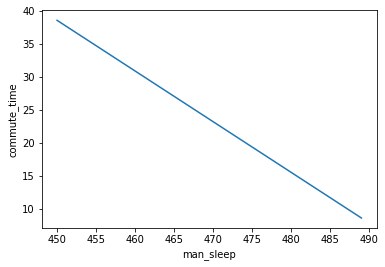

In [131]:
# x軸の値作成
x = np.arange(450, 490, 1)
plt.plot(x, b*x+a, )
plt.xlabel('man_sleep')
plt.ylabel('commute_time')

In [132]:
# 8時間睡眠している男性の平均通勤時間は？
X = np.array([[480]])
y = reg.predict(X)
print(X, y)  # 約15分！（そんなバカな）

[[480]] [15.47994833]


### 説明変数と目的変数の入れ替え

入れ替えてみるとどうなるのでしょうか？  
$a$と$b$を入れ替えてみた結果はこちらです。

$$
a^{'}=\bar{x}-b^{'}\bar{x}  
$$

$$
b^{'}=r\frac{s_x}{s_y}
$$

説明変数と目的変数を入れ替えると、別の回帰直線ができあがります。

Text(0, 0.5, 'weight')

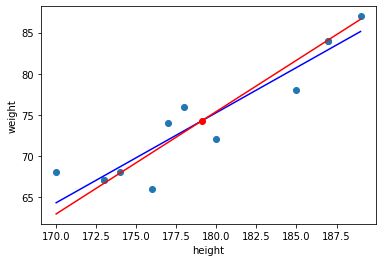

In [133]:
weight = np.array([68, 84, 68, 87, 78, 84, 76, 74, 66, 72, 67, 67])
height = np.array([174, 187, 170, 189, 185, 187, 178, 177, 176, 180, 173, 173])

# reg1: heightからweightを予測する回帰直線
X = np.expand_dims(height, axis=-1)
y = weight
reg1 = LinearRegression()
reg1.fit(X, y)
 
# reg2: weightからheightを予測する回帰直線
X = np.expand_dims(weight, axis=-1)
y = height
reg2 = LinearRegression()
reg2.fit(X, y)
 
x = np.arange(170, 190, 1)
plt.scatter(height, weight)

plt.plot(x, x*reg1.coef_+reg1.intercept_, 'b')
# reg2を描画(x=a'+b'yを変形し，y=(x-a')/b')となることに注意
plt.plot(x, (x-reg2.intercept_)/reg2.coef_, 'r')
# reg1とreg2が交差している点がweightとheightの平均の点
plt.plot(np.mean(height), np.mean(weight), 'ro')
plt.xlabel('height')
plt.ylabel('weight')

どちらの回帰直線も$(\bar{x} , \bar{y})$ を通るので、  
$(\bar{x} , \bar{y})$ で交わっています。

In [134]:
print(f"体重の平均：{np.mean(weight)}")
print(f"身長の平均：{np.mean(height)}")

体重の平均：74.25
身長の平均：179.08333333333334


とる目的変数によって回帰直線が変化してしまうので注意が必要です。

## 決定係数

「説明変数がどれだけ目的変数の値を説明しているかの指標」を**決定係数**といいます。

一般的に$R^2$で示され、0から1までの値をとります。  
1に近いほど、回帰式が実際のデータに当てはまっていることを表しています。

基準の目安は以下の通りです。  
（参考：https://istat.co.jp/ta_commentary/multiple_02 ）

* **0.8以上**：精度良い
* **0.5~0.8**：精度やや良い
* **0.5以下**：精度良くない


### 決定係数の定義

![リンクテキスト](https://imgur.com/gsoWMOU.png)

①：全変動：実測値とデータ全体の平均値との差  
②：回帰変動：予測値とデータ全体の平均値との差  
③：残差変動：実測値と予測値との差

②の回帰変動は「回帰直線によって説明できた部分」、  
③の残差変動は「回帰直線によって説明できなかった部分」となります。

（[こちら](https://bit.ly/3XZs1IQ)などに書かれている証明によって）以下の式が成り立ちます。

$$
\sum (y_i-\bar{y})^2 = \sum(\hat{y}_i-\bar{y})^2 + \sum(y_i-\hat{y}_i)^2
$$



決定係数は「回帰変動が全変動に対してどれだけ多いか」を表すものなので、  
決定係数は回帰変動を全変動で割ることで求められます。

$$
R^2 = \frac{\sum(\hat{y}_i-\bar{y})^2}{\sum (y_i-\bar{y})^2} = 1-\frac{\sum(y_i-\hat{y}_i)^2}{\sum (y_i-\bar{y})^2}
$$

**回帰直線が最小二乗法によって求められた場合、この$R$は相関係数$r$と一致します**。  
重要なので覚えておきましょう。

### Pythonによる決定係数の導出

適当に身長と体重のデータを用意したので、決定係数を求めてみましょう。

In [135]:
# 学習データ
weight = np.array([68, 84, 68, 87, 78, 84, 76, 74, 66, 72, 67, 67])
height = np.array([174, 187, 170, 189, 185, 187, 178, 177, 176, 180, 173, 173])

# モデルの作成と学習
reg = LinearRegression()

X = np.expand_dims(height, axis=-1)
y = weight
reg.fit(X, y)

LinearRegression()

In [136]:
# 評価データ
weight_test = np.array([64, 88, 75, 72, 75, 84, 64, 75, 70, 73, 71, 68])
height_test = np.array([172, 197, 183, 178, 186, 188, 175, 175, 180, 178, 173, 174])

# 予測値
X_test = np.expand_dims(height_test, axis=-1)
y_test_pred = reg.predict(X_test)

In [137]:
# 決定係数
r2_score(weight_test, y_test_pred)

0.6376269742887806

## 重回帰分析

複数の説明変数 $x_i$ ($i=1,2,3,…n$)を用いて目的変数$y$を表す回帰分析を  
**重回帰分析**といいます。

### 重回帰分析の流れ

① **モデル**を決める  
② **損失関数**を決める  
③ 損失関数を「**最小化**」する

#### モデルを決める

今回は特徴量が複数なので、各データの値を$x_{ij}$とし、  
$j$番目の特徴量の$i$番目のデータという風にします。

予測値 $\hat{y}_i$ は以下の式で表されます。

$$
\hat{y}_i = \theta_1x_{i1} + \theta_2x_{i2} + … + \theta_nx_{in}
$$

説明変数の重要度が高いものはパラメータ $\theta$ の値が大きくなります。

単回帰分析のときと同様、多少の誤差を考慮する必要があります。  
これを $b$（**バイアス**）で表します。

式を書き直すと以下のようになります。

$$
\hat{y}_i = \theta_1x_{i1} + \theta_2x_{i2} + … + \theta_nx_{in} + b
$$

$b = \theta_0×x_0 = \theta_0×1$ とダミーの変数を用いることで、  
形式を他の項に合わせることができます。

$$
\hat{y}_i = \theta_1x_{i1} + \theta_2x_{i2} + … + \theta_nx_{in} + \theta_0x_{i0}
$$

これを行列の形に変形します。

$$
\begin{bmatrix} 
\hat{y}_1 \\ 
\hat{y}_2 \\ 
\vdots \\ 
\hat{y}_{m-1} \\ 
\hat{y}_m \\ 
\end{bmatrix} 
= 
\begin{bmatrix} 
x_{10} & x_{11} & \cdots & x_{1n-1} & x_{1n}   \\ 
x_{20} & x_{21} & \cdots & x_{2n-1} & x_{2n}   \\ 
\vdots & \vdots & \cdots & \vdots & \vdots \\ 
x_{m-10} & x_{m-11} & \cdots & x_{m-1n-1} & x_{m-1n}   \\ 
x_{m0} & x_{m1} & \cdots & x_{mn-1} & x_{mn}   \\ 
\end{bmatrix} 
\begin{bmatrix} 
\theta_0 \\ 
\theta_1 \\ 
\vdots \\ 
\vdots \\ 
\theta_{n-1} \\ 
\theta_n \\ 
\end{bmatrix}
$$

それぞれの行列およびベクトルを $\mathbf{\hat{y}},\mathbf{X},\theta$ とすると、

$$
\mathbf{\hat{y}}=\mathbf{X}\mathbf{\theta}
$$

と表すことができます。

#### 損失関数を決める

基本は単回帰分析のときと同様です。

$$
\sum^{n}_{i=1}{e_i^2}= \sum^{n}_{i=1}({y_i-\hat{y}_i)^2}
$$

#### 損失関数を「最小化」する

損失関数を計算すると、以下のような結果が得られます。

$$
\theta=(\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y} 
$$

（答えの導出過程は[こちら](https://bit.ly/3lTzKuL)や『データサイエンス入門』第7回講義資料を参照してください。）  

この式は**正規方程式**と呼ばれます。

# 終わりに

Pythonで重回帰分析を行おうとすると重たくなってしまうので  
本資料はここまでとします。